# Analyzing the UncertaintyForest Class by Reproducing Posterior Estimates

In [11]:
# import libraries
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from proglearn.forest import UncertaintyForest
from functions.unc_forest_tutorials_functions import estimate_posterior, plot_fig1

In [12]:
# The following are two sets of parameters.
# The first are those that were actually used to produce Figure 1.
# These take a long time to actually run since there are 6000 data points.
# Below those, you'll find some scaled-down parameters so that you can see the results more quickly.

# Here are the paper reproduction parameters
#n = 6000
#mean = 1
#var = 1
#num_trials = 100
#X_eval = np.linspace(-2, 2, num = 30).reshape(-1, 1)
#n_estimators = 300
#num_plotted_trials = 10

# Here are the scaled-down tutorial parameters
n = 300 # number of data points
mean = 1 # mean of the data
var = 1 # variance of the data
num_trials = 3 # number of trials to run
X_eval = np.linspace(-2, 2, num = 10).reshape(-1, 1) # the evaluation span (over X) for the plot
n_estimators = 200 # the number of estimators
num_plotted_trials = 2 # the number of "fainter" lines to be displayed on the figure

In [13]:
# Algorithms used to produce Figure 1
algos = [
    {
        'instance': RandomForestClassifier(n_estimators = n_estimators),
        'label': 'CART',
        'title': 'CART Forest',
        'color': "#1b9e77",
    },
    {
        'instance': CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators = n_estimators // 5),
                                           method='isotonic',
                                           cv = 5),
        'label': 'IRF',
        'title': 'Isotonic Reg. Forest',
        'color': "#fdae61",
    },
    {
        'instance': UncertaintyForest(n_estimators = n_estimators, tree_construction_proportion = 0.4, kappa = 3.0),
        'label': 'UF',
        'title': 'Uncertainty Forest',
        'color': "#F41711",
    },
]

# Plotting parameters
parallel = False

In [14]:
# This is the code that actually generates data and predictions.
for algo in algos:
    algo['predicted_posterior'] = estimate_posterior(algo, n, mean, var, num_trials, X_eval, parallel = parallel)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

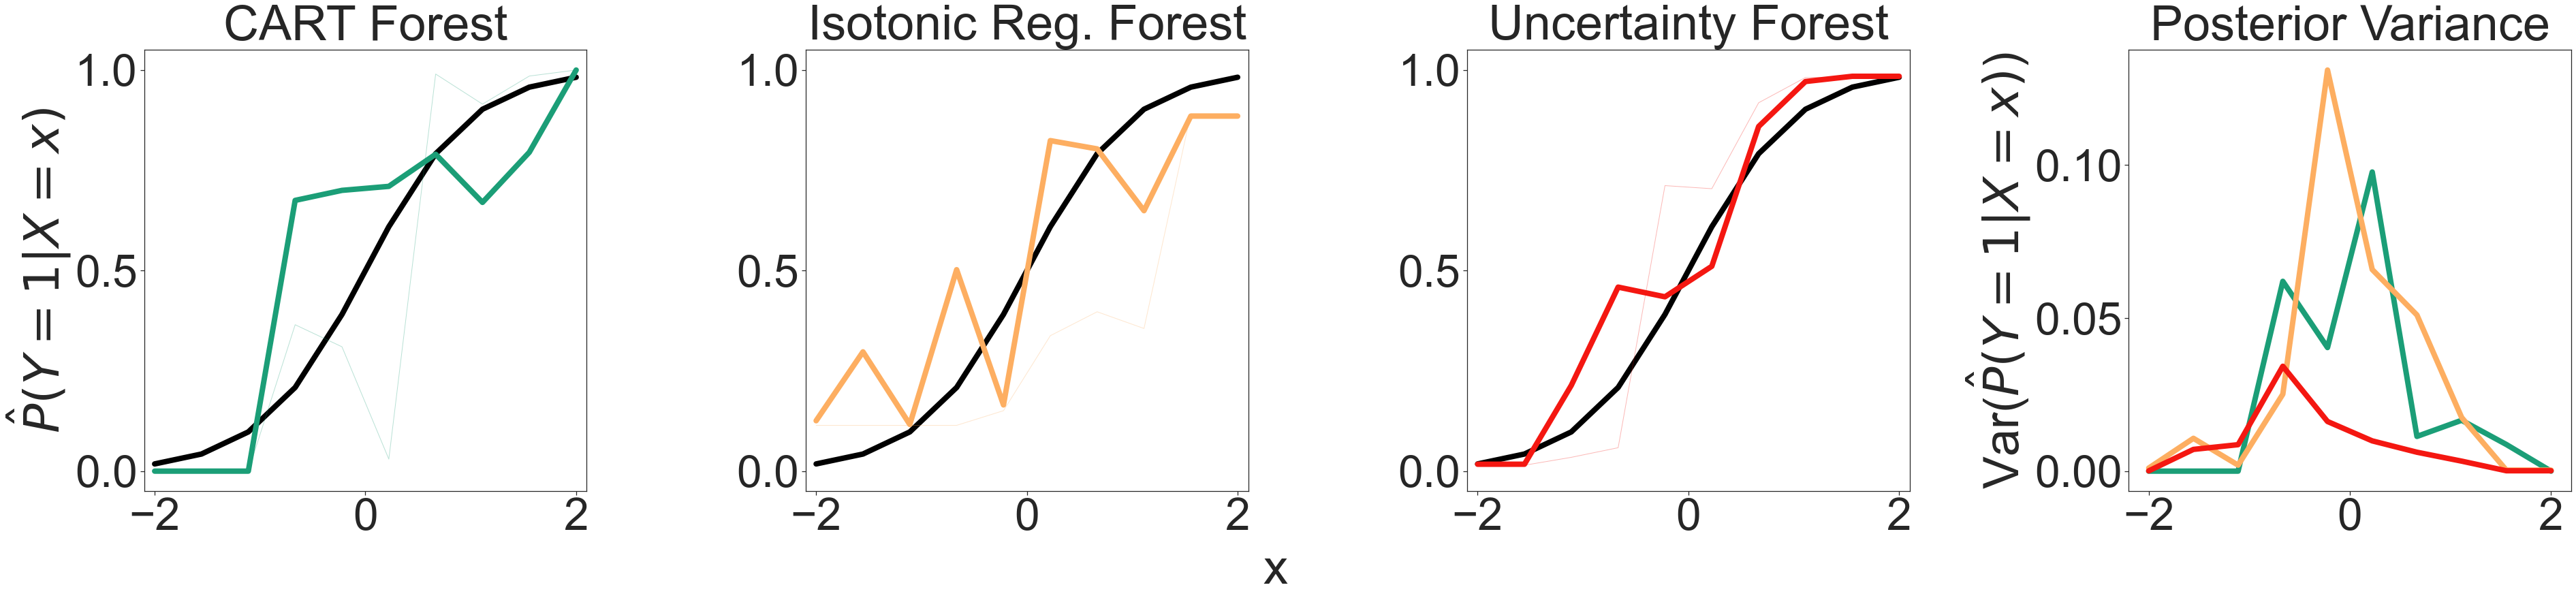

In [15]:
plot_fig1(algos, num_plotted_trials, X_eval, n, mean, var)